In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('index_data/mid_cap_all_sectors_ret.csv', index_col='date')

<Axes: xlabel='date'>

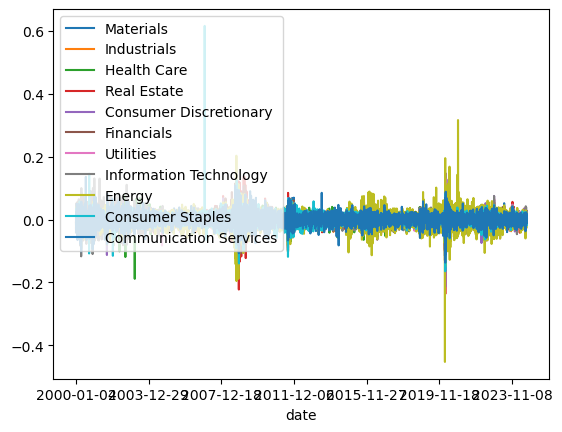

In [3]:
data.plot()

In [4]:
import torch
import torch.nn as nn

def data_to_tensor(data, dtype=torch.float32):
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    return torch.tensor(np.array(data), dtype=dtype).to(device)

class CNNDataset(torch.utils.data.Dataset):
    def __init__(self, data: pd.Series, seq_n: int) -> None:
        sample_index = data.shift(seq_n-1).dropna().index.tolist()
        self.data_list = []
        for sample in sample_index:
            data_tensor = data_to_tensor(data.loc[:sample].iloc[-seq_n:].T)
            data_tuple = (data_tensor, data_tensor)
            self.data_list.append(data_tuple)

    def __len__(self):
        return len(self.data_list)
    
    def __getitem__(self, index):
        return self.data_list[index]

In [6]:
dataset = CNNDataset(data, 100)

In [9]:
dataset[0][0].shape

torch.Size([11, 100])